In [86]:
import unittest
import pickle
from OOPgraph import Parser
from OOPgraph import Post_processing
import os
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [87]:
lib = 'urllib3'
lib2 = 'urllib32'
size_image = 50
min_subclasses = 0
max_subclasses = None

p = Parser('../frameworks/urllib3/')
p.run()
pp = Post_processing(lib, p.list_classes, p.list_files_sizes, p.list_classes_for_html)
pp.save()

p2 = Parser('../frameworks/urllib32/')
p2.run()
pp2 = Post_processing(lib, p.list_classes, p.list_files_sizes, p.list_classes_for_html)
pp2.save()

In [88]:
pos_glob = None
pos_glob2 = None
pos_glob3 = None

def graph(lib, list_classes_for_graph, dict_classes_sizes, class_counter_lt_gt, size_image=50, min_subclasses=0, max_subclasses=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_image, size_image)
    fig.patch.set_visible(False)
    ax.set_facecolor('k')
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

    DG = nx.DiGraph()
    G = nx.Graph()

    for i in list_classes_for_graph:
        if i[0] not in class_counter_lt_gt and i[1] not in class_counter_lt_gt:
            DG.add_edge(i[0], i[1])
            G.add_edge(i[0], i[1])
            
    #print(G.nodes())

    df = pd.DataFrame(list(G.degree), columns=['node','degree']).set_index('node')
    if df.empty:
        print("Graph is empty")
        sys.exit()
    df_size = pd.DataFrame({'node': list(dict_classes_sizes.keys()), 'size': list(dict_classes_sizes.values())})
    df = pd.merge(df, df_size, how='left', on='node')
    df['color'] = df['size'].rank()
    vmin = df['color'].min()
    vmax = df['color'].max()
    cmap = plt.cm.rainbow

    global pos_glob
    global pos_glob2
    global pos_glob3
    if pos_glob == None:
        pos = nx.spring_layout(G, k=0.2, center=[0.06044396, 0.10200885], seed=38)
        pos_glob = pos
    else:
        pos = nx.spring_layout(G, k=0.2, seed=38)        
        pos_glob2 = pos
        common_keys = set(pos_glob.keys()) & set(pos_glob2.keys())
        pos0 = dict()
        for k in common_keys:
            pos0[k] = pos_glob[k]
            #print(pos0[k], pos_glob[k])

        pos = nx.spring_layout(G, k=0.01, pos=pos0, fixed=common_keys, center=[0.06044396, 0.10200885], seed=38)
        pos_glob3 = pos

    nx.draw_networkx(DG, pos=pos, arrows=True, arrowsize=20, node_size=df.degree*100, node_color=df['color'],\
                     edge_color='grey', font_color='white', cmap=cmap, vmin=vmin, vmax=vmax)
    plt.savefig(f'{lib}_gt_{min_subclasses}_lt_{max_subclasses}.png')

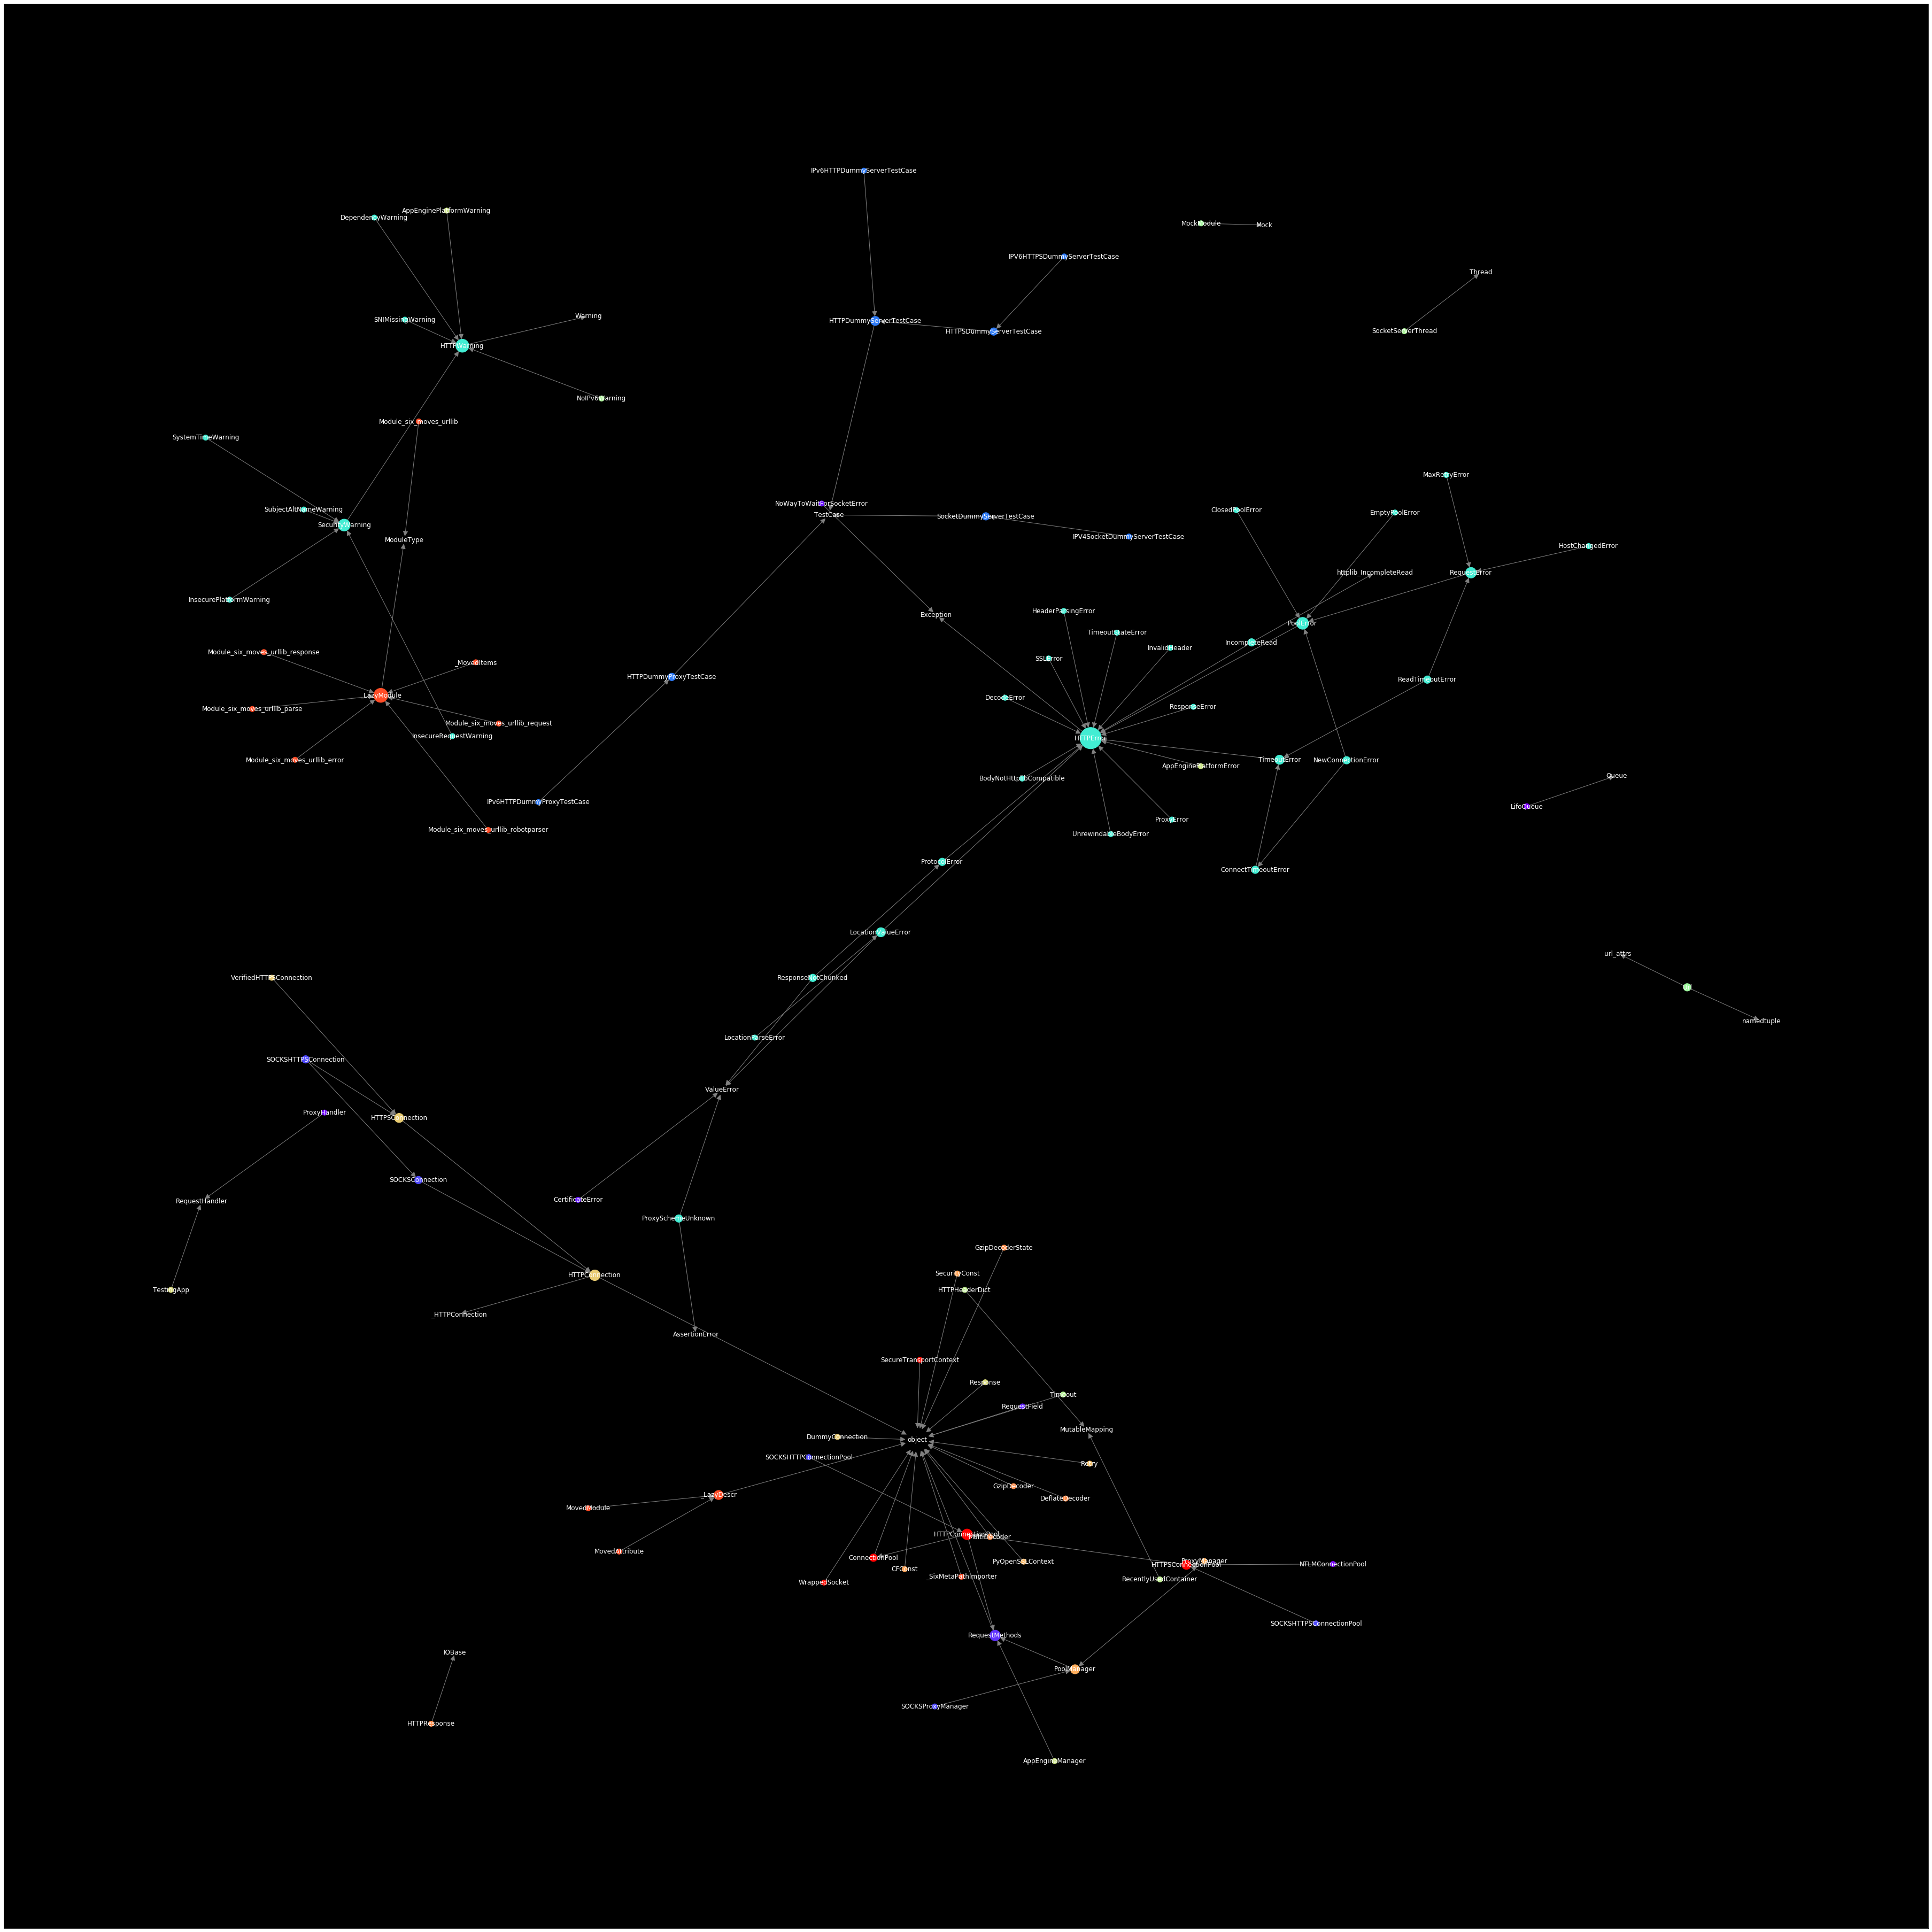

In [89]:
graph(lib, p.list_classes_for_graph, p.dict_classes_sizes, pp.class_counter_lt_gt, size_image, min_subclasses, max_subclasses)

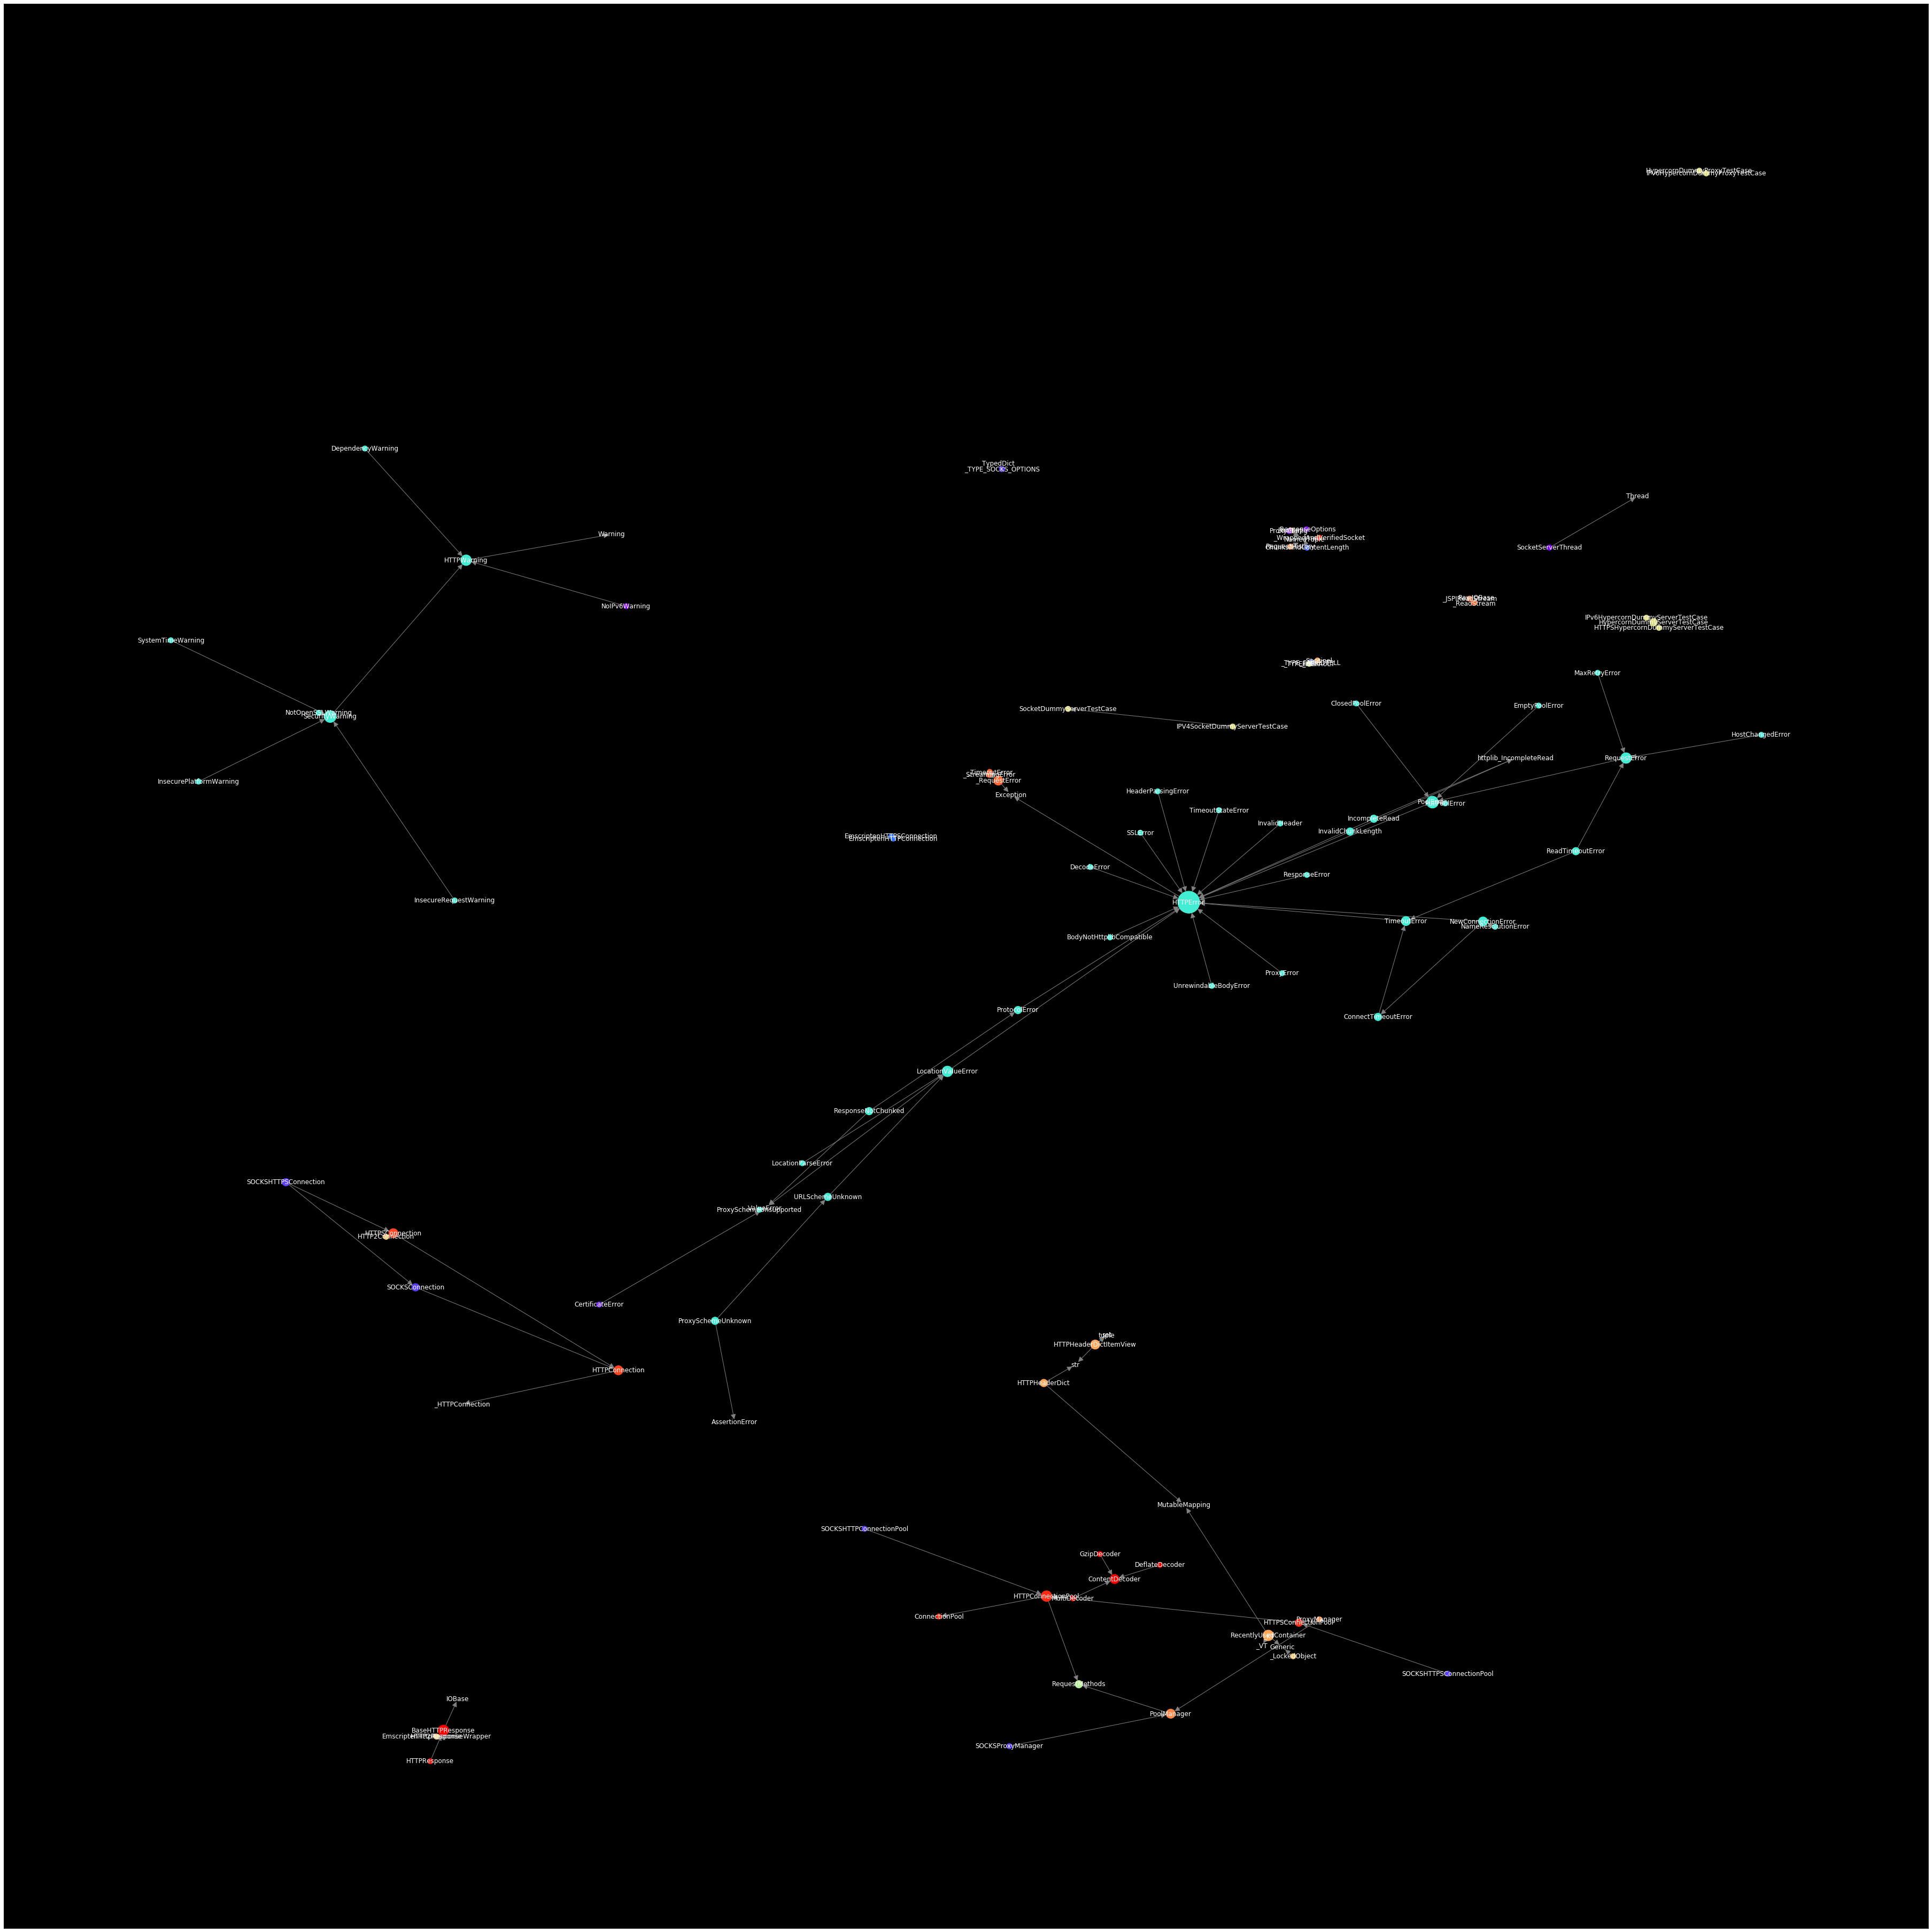

In [90]:
graph(lib2, p2.list_classes_for_graph, p2.dict_classes_sizes, pp2.class_counter_lt_gt, size_image, min_subclasses, max_subclasses)

In [91]:
for k in (set(pos_glob.keys()) & set(pos_glob2.keys())):
    print(k, pos_glob[k], pos_glob2[k], pos_glob3[k])

TimeoutError [0.50783386 0.3236627 ] [-0.43656639  0.30396254] [0.50783386 0.3236627 ]
ProxyError [0.38435778 0.25361196] [-0.48736329  0.05943109] [0.38435778 0.25361196]
HeaderParsingError [0.26024553 0.49808226] [-0.21812957  0.01026172] [0.26024553 0.49808226]
HTTPSConnectionPool [ 0.40103855 -0.61970248] [-0.04760806 -0.93742093] [ 0.40103855 -0.61970248]
LocationValueError [0.05050663 0.12154311] [-0.56907301  0.00871116] [0.05050663 0.12154311]
SOCKSHTTPConnectionPool [-0.03215151 -0.49351565] [ 0.15264777 -0.99637474] [-0.03215151 -0.49351565]
MutableMapping [ 0.286781   -0.46133054] [0.03105551 0.24662299] [ 0.286781   -0.46133054]
RequestMethods [ 0.1815864  -0.70248746] [ 0.29099707 -0.51637005] [ 0.1815864  -0.70248746]
httplib_IncompleteRead [0.61741289 0.54305752] [-0.79536177  0.10506758] [0.61741289 0.54305752]
AssertionError [-0.16157894 -0.34989975] [-0.98084996  0.38334686] [-0.16157894 -0.34989975]
TimeoutStateError [0.32134437 0.47265372] [-0.23065301  0.13671793] 